<center>
    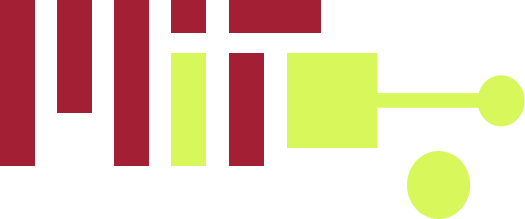
</center>



<!-- 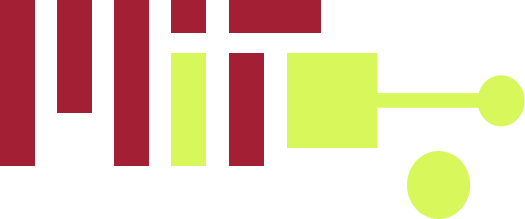 -->

# State Preparation Workshop: Classiq Challenge

**We now have a new Web-SDK with a Python environment set up for you and a personal workspace where all your work will be saved!**  
Please upload this notebook to the Web-SDK on our [platform](https://platform.classiq.io/) in your persistent user workspace and try solving it there.

## Welcome to the Classiq Prepration Workshop of the MIT iQuHack Hackathon 2025!

### Motivation

**State Preparation** is a fundamental step in quantum algorithms, enabling quantum systems to start from well-defined initial states. Efficient state preparation is crucial as it directly impacts the accuracy and scalability of quantum computations.

**With the scaling of quantum hardware, achieving efficient and precise state preparation will directly improve the costs of quantum algorithms and enhance impactful applications!**

**Your resources:**
- The Classiq IDE at [platform.classiq.io](https://platform.classiq.io/).
- The [Classiq Library](https://github.com/Classiq/classiq-library) – the largest collection of quantum functions, algorithms, and tutorials.
- [Classiq's documentation](https://docs.classiq.io/latest/), and the [Classiq101](https://docs.classiq.io/latest/classiq_101/) for quick onboarding to high-level quantum modelling concepts.
- The [Classiq Community Slack](https://short.classiq.io/join-slack) – where the Classiq team will address any questions, including implementation-related queries.

### If you are not using the Web-SDK:

1. Firstly, if you haven't already, install the Classiq SDK package. If it's already installed, make sure to update it to the latest version.

In [2]:
!pip install -U classiq


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


2. Authenticate your device against the Classiq backend:

In [3]:
import classiq
classiq.authenticate() # Uncoment to authenticate. For the first (local) run only

Your user code: DRWQ-VPJL
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=DRWQ-VPJL


### Classiq 101

The [Classiq101](https://docs.classiq.io/latest/classiq_101/) is a great resource for getting the basics of the concept of high-level modeling quickly.\
As a first step, take a couple of minutes to go through the first page of the design section from the Classiq101 [here](https://docs.classiq.io/latest/classiq_101/classiq_concepts/design/)

In [10]:
from classiq import *


@qfunc
def main(x: Output[QNum], y: Output[QNum]):

    allocate(3, x)
    hadamard_transform(x)  # creates a uniform superposition
    y |= x**2 + 1

In [11]:
quantum_program = synthesize(create_model(main))
show(quantum_program)

Opening: https://platform.classiq.io/circuit/2sTmlvTnCZAjZZaXqLq7JAEqVlo?version=0.66.1


In [12]:
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/2sTn2LVZR9wkkxFU0H0KrxpbKNk?version=0.66.1


<details markdown>
<summary>Check Yourself Here!</summary>

The solution:

```python
@qfunc
def main(x: Output[QNum], y: Output[QNum], z: Output[QNum]):
    allocate(3, x)
    allocate(3, z)
    hadamard_transform(x)
    hadamard_transform(z)
    
    y |= 2*x + 4*z + 2
```
\
If you didn't get a similar solution, copy-paste and run this one!

### State Prepration

Classiq provides many different high-level functions, allowing quick state preparation. We will review few particularly useful ones.

#### The `prepare_state()` function:

Let's say you have a list of probabilities and wish to prepare a quantum state corresponding to this probability distribution.  
The `prepare_state()` function takes a normalized probabilities list, an accuracy bound (L2 metric), and a variable of type `QArray`.

In [15]:
from classiq import *
import numpy as np

rand_array = np.random.rand(32)
normalized_random_list = (rand_array / np.sum(rand_array)).tolist()

print(f"The list: \n{normalized_random_list}")

@qfunc
def main(x: Output[QArray[QBit]]):
    prepare_state(probabilities=normalized_random_list, bound=0.01, out=x)


qmod = create_model(main) # Creating the quantum model
qprog = synthesize(qmod)  # Creating the quantum program

The list: 
[0.025715502005345607, 0.03402088722884128, 0.041964891113244786, 0.053064973535077636, 0.052922850786495036, 0.045295261319931675, 0.02932617496293825, 0.020911176489123457, 0.05522272006558243, 0.05374113952905356, 0.011542254202612304, 0.03333546386731233, 0.04146188495369937, 0.009356261075947793, 0.04412439576046361, 0.02224434633636964, 0.04007988041384711, 0.001999139685378947, 0.012148435145678862, 0.04565978472439212, 0.00139048902537396, 0.030107241001870205, 0.012087044100588754, 0.040527038013275674, 0.04245012906560787, 0.03920340846504645, 0.03447085975956273, 0.04381658154405644, 0.008262641481629786, 0.036039813791200415, 0.002592075428683874, 0.03491525512176803]


In [16]:
show(qprog)

Opening: https://platform.classiq.io/circuit/2sOsL52oHd5fUDadbAMPNXe4urw?version=0.66.1


#### Numeric Assignment:

Classiq supports various numerical assignment methods.  
Let's demonstrate a simple use case of these capabilities. Assume we want to calculate the sum of two quantum variables, `x` and `y`, with some values, in the $\mathbb{R}$ domain, and output the result in another variable, `res`. We can achieve this using the `QNum` type and the numerical assignment capabilities.

In [24]:


# @qfunc
# def main(res: Output[QNum], x: Output[QNum[3,UNSIGNED,0]], y: Output[QNum[5,SIGNED,1]]):
#     # Using numerical assignment:
#     x |= 5
#     y |= -7.5
#     res |= x+y

from classiq import qfunc, Output, QNum, allocate, hadamard_transform, phase
from classiq.qmod.symbolic import pi


@qfunc
def main(x: Output[QNum]):
    allocate(6, x)
    hadamard_transform(x)
    qft(x)
    phase(x**2, pi / 4)
    invert(stmt_block=lambda: qft(x)) 


qmod = create_model(main)
qprog = synthesize(qmod)

In [22]:
show(qprog)

Opening: https://platform.classiq.io/circuit/2sTrUu1wRQYiUUYUsU6hYESuyD1?version=0.66.1


<details markdown>
<summary>Note on Local Variables</summary>

The same function using local variables:

```python
@qfunc
def main(res: Output[QNum]):
    # Initializing local variables `x` and `y`:
    x = QNum()
    y = QNum()

    # Using numerical assignment:
    x |= 5
    y |= -7.5
    res |= x + y


<details markdown>
<summary>Note on Numeric Assignment</summary>

The `|=` operator assumes no prior allocation of qubits. If you're using an already initialized variable, you may use the in-place XOR operator `^=`. Additionally, the `+=` operator can be used to intuitively add a value to an already initialized variable.

Read more: [Numeric Assignment](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/numeric-assignment/?h=numeric)

</details>


You can learn more about it [here](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/numeric-assignment/).

#### Amplitude-Encoding Assignment:

In [27]:
from classiq import *

a = 3
b = 2

@qfunc
def main(x: Output[QNum[5, UNSIGNED, 5]], y: Output[QNum]) -> None:
    allocate(5, x)
    hadamard_transform(x)
    allocate(1, y)
    
    y *= x**2

qmod = create_model(main)
qprog = synthesize(qmod)

In [28]:
res = execute(qprog).get_sample_result()

In [3]:
res.parsed_counts

[{'x': 0.375, 'y': 0}: 76,
 {'x': 0.3125, 'y': 0}: 73,
 {'x': 0.125, 'y': 0}: 70,
 {'x': 0.96875, 'y': 1}: 69,
 {'x': 0.15625, 'y': 0}: 67,
 {'x': 0.1875, 'y': 0}: 66,
 {'x': 0.25, 'y': 0}: 66,
 {'x': 0.09375, 'y': 0}: 65,
 {'x': 0.5625, 'y': 0}: 65,
 {'x': 0.03125, 'y': 0}: 65,
 {'x': 0.53125, 'y': 0}: 64,
 {'x': 0.21875, 'y': 0}: 63,
 {'x': 0.5, 'y': 0}: 63,
 {'x': 0.46875, 'y': 0}: 62,
 {'x': 0.0625, 'y': 0}: 62,
 {'x': 0.34375, 'y': 0}: 60,
 {'x': 0.40625, 'y': 0}: 58,
 {'x': 0.0, 'y': 0}: 57,
 {'x': 0.4375, 'y': 0}: 56,
 {'x': 0.65625, 'y': 0}: 56,
 {'x': 0.625, 'y': 0}: 56,
 {'x': 0.6875, 'y': 0}: 56,
 {'x': 0.28125, 'y': 0}: 52,
 {'x': 0.75, 'y': 0}: 48,
 {'x': 0.71875, 'y': 0}: 47,
 {'x': 0.90625, 'y': 1}: 47,
 {'x': 0.8125, 'y': 0}: 43,
 {'x': 0.59375, 'y': 0}: 40,
 {'x': 0.84375, 'y': 1}: 34,
 {'x': 0.9375, 'y': 1}: 33,
 {'x': 0.84375, 'y': 0}: 30,
 {'x': 0.875, 'y': 1}: 29,
 {'x': 0.8125, 'y': 1}: 27,
 {'x': 0.78125, 'y': 1}: 24,
 {'x': 0.75, 'y': 1}: 24,
 {'x': 0.78125, 'y'

In [4]:
res.parsed_counts_of_outputs("x") # Only "correct" results

[{'x': 0.375}: 77,
 {'x': 0.6875}: 74,
 {'x': 0.96875}: 73,
 {'x': 0.3125}: 73,
 {'x': 0.5625}: 72,
 {'x': 0.75}: 72,
 {'x': 0.90625}: 70,
 {'x': 0.8125}: 70,
 {'x': 0.125}: 70,
 {'x': 0.65625}: 70,
 {'x': 0.53125}: 69,
 {'x': 0.5}: 69,
 {'x': 0.46875}: 68,
 {'x': 0.15625}: 67,
 {'x': 0.1875}: 66,
 {'x': 0.25}: 66,
 {'x': 0.09375}: 65,
 {'x': 0.625}: 65,
 {'x': 0.03125}: 65,
 {'x': 0.21875}: 64,
 {'x': 0.84375}: 64,
 {'x': 0.0625}: 62,
 {'x': 0.34375}: 61,
 {'x': 0.40625}: 61,
 {'x': 0.71875}: 58,
 {'x': 0.4375}: 58,
 {'x': 0.0}: 57,
 {'x': 0.28125}: 52,
 {'x': 0.78125}: 48,
 {'x': 0.9375}: 48,
 {'x': 0.59375}: 47,
 {'x': 0.875}: 47]

In [23]:
show(qprog)

Opening: https://platform.classiq.io/circuit/2sOsMdmixl1B9voWzQizOkbiXXS?version=0.66.1


You can learn more about it [here](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/amplitude-encoding-assignment/)

<details markdown>
<summary markdown>Note on QNum type</summary>

The `QNum` type is a `QArray` that contains additional information that helps interpret the quantum state as a scalar or as a superposition of those encoded in a quantum state, as well as other useful information for numerical operations. You may read and learn more about it [here](https://docs.classiq.io/latest/qmod-reference/language-reference/quantum-types/)

</details>

**The [classiq-library repository](https://github.com/Classiq/classiq-library) contains the largest collection of updated functions, tutorials, and implementations of algorithms and applications, all fully available for your use.**

#### Warm-Up Exercise

For better preparation for the hackathon, try solving the following task as a warm-up:

- implement an algorithm that prepares an exponential state with a decay rate of `0.1`
- Allocate 5 qubits to the variable `x`
- Apply QFT on the exponential state

<details>
<summary>Bonus Exercise</summary>

Adapt the `create_model` function to use `ExecutionPreferences`, and set the backend to `backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR` as well as `num_shots=1`.

**Read more [here](https://docs.classiq.io/latest/sdk-reference/execution/?h=executionpreferences#classiq.execution.ExecutionPreferences)**

</details>


In [5]:
from classiq import *
from classiq.execution import ExecutionPreferences, ClassiqSimulatorBackendNames

# Define the quantum function
@qfunc
def main(x: Output[QArray[QBit]]):
    allocate(5, x)  # Allocate 5 qubits to x
    prepare_exponential_state(0.1, x)  # Prepare the exponential state with decay rate 0.1

# Define execution preferences
execution_preferences = ExecutionPreferences(
    backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR,  # Use the statevector simulator
    num_shots=1  # Only 1 shot is needed for statevector simulation
)

# Create the quantum model with execution preferences
qmod = create_model(main, execution_preferences=execution_preferences)

# Synthesize the quantum program
qprog = synthesize(qmod)

# Display the quantum program
show(qprog)

Opening: https://platform.classiq.io/circuit/2sSo3YNCfZXHIki7gl6UrfteNJW?version=0.66.1


In [8]:
qmod = create_model(main) # Adapt in Bouns Exercise
qprog = synthesize(qmod)

In [9]:
show(qprog)

Opening: https://platform.classiq.io/circuit/2sTag3mSUldchEB6D9zGAe602nN?version=0.66.1


# Looking Forward to Connecting During the Challenge!
### Good Luck! 